In [14]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")


In [28]:
df = pd.read_csv("all_series.csv")
df

,name,total_episode,rating,like,watch,cast,category,year,url
0,Because of You,22.00,7.00,11,3,"[{'name': 'Lego Lee Fang', 'caracter': 'Zi Hao...","Gençlik,Romantik,Tayvan Dizileri",2010,https://asyafanatiklerim.com/dizi/because-of-you/
1,49 Days,20.00,8.40,82,64,"[{'name': 'Jo Hyun-jae', 'caracter': 'Han Kang...","Dram,Fantastik,Romantik",2011,https://asyafanatiklerim.com/dizi/49-days/
2,The Slave Hunters,24.00,7.90,46,32,"[{'name': 'Jang Hyuk', 'caracter': 'Lee Dae-gi...","Aksiyon,Dram,Tarih",2010,https://asyafanatiklerim.com/dizi/the-slave-hu...
3,Secret Garden,20.00,8.90,198,150,"[{'name': 'Hyun Bin', 'caracter': 'Kim Joo-won...","Dram,Fantastik,Komedi",2010,https://asyafanatiklerim.com/dizi/secret-garde...
4,A Man Called God,24.00,6.70,10,9,"[{'name': 'Song Il-gook', 'caracter': 'Michael...","Dram,Romantik",2010,https://asyafanatiklerim.com/dizi/a-man-called...
...,...,...,...,...,...,...,...,...,...
1003,Flex X Cop,16.00,9.10,77,32,"[{'name': 'Ahn Bo-hyun', 'caracter': 'Jin I-so...","Aksiyon,Gizem,Suç",2024,https://asyafanatiklerim.com/dizi/flex-x-cop/
1004,The Midnight Studio,16.00,8.00,62,28,"[{'name': 'Joo Won', 'caracter': 'Seo Ki-joo'}...","Dram,Fantastik,Romantik",2024,https://asyafanatiklerim.com/dizi/the-midnight...
1005,Queen of Tears,16.00,8.60,58,36,"[{'name': 'Kim Soo-hyun', 'caracter': 'Baek Hy...","Dram,Romantik",2024,https://asyafanatiklerim.com/dizi/queen-of-tears/
1006,Doctor Slump,16.00,8.40,81,44,"[{'name': 'Park Shin-hye', 'caracter': 'Nam Ha...","Dram,Komedi,Romantik",2024,https://asyafanatiklerim.com/dizi/doctor-slump/


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1008 non-null   object 
 1   total_episode  932 non-null    float64
 2   rating         1008 non-null   float64
 3   like           1008 non-null   int64  
 4   watch          1008 non-null   int64  
 5   cast           973 non-null    object 
 6   category       1008 non-null   object 
 7   year           1008 non-null   int64  
 8   url            1008 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 71.0+ KB


In [30]:
df.loc[df["url"].str.contains("/film"), "total_episode"] = df.loc[df["url"].str.contains("/film"), "total_episode"].fillna(1)
df[df["total_episode"].isna()]

,name,total_episode,rating,like,watch,cast,category,year,url
242,After the Show Ends,NaN,8.20,77,37,"[{'name': 'Yoon So-hee', 'caracter': None}, {'...","Dram,Fantastik,Romantik",2016,https://asyafanatiklerim.com/dizi/after-the-sh...
311,Bir Doksan (One Ninety),NaN,7.80,77,49,NaN,"Gençlik,Kazakistan Dizileri,Komedi,Romantik",2017,https://asyafanatiklerim.com/dizi/bir-doksan-o...
443,Smile,NaN,8.80,152,86,NaN,"Çin Dizileri,Komedi,Romantik",2018,https://asyafanatiklerim.com/dizi/smile/
604,Kill It,NaN,9.30,298,162,"[{'name': 'Jang Ki-Yong', 'caracter': 'Kim Soo...","Aksiyon,Gizem",2019,https://asyafanatiklerim.com/dizi/kill-it/


In [31]:
df.loc[df["name"] == "After the Show Ends", "total_episode"] = df.loc[df["name"] == "After the Show Ends", "total_episode"].fillna(8)
df.loc[df["name"] == "Bir Doksan (One Ninety)", "total_episode"] = df.loc[df["name"] == "Bir Doksan (One Ninety)", "total_episode"].fillna(5)
df.loc[df["name"] == "Smile", "total_episode"] = df.loc[df["name"] == "Smile", "total_episode"].fillna(24)
df.loc[df["name"] == "Kill It", "total_episode"] = df.loc[df["name"] == "Kill It", "total_episode"].fillna(12)

In [32]:
df["total_episode"] = df["total_episode"].astype("Int64")

# Category column was encoded. 

In [20]:
# Kategorileri içeren bir liste oluşturun
categories_list = []

# "category" sütununu işleyin
for cat_string in df["category"]:
    # Virgülle ayrılmış kategorileri parçalayın
    categories = cat_string.split(",")
    
    # Her bir kategori için
    for category in categories:
        # Boşlukları temizleyin
        category = category.strip().lower()
        
        # Kategoriyi listeye ekleyin
        categories_list.append(category)

# Her bir kategori için yeni bir sütun oluşturun
for category in set(categories_list):
    df[category] = df["category"].str.contains(category, case=False).astype(int)


In [33]:
categories_list = []

# "category" sütununu işleyin
for cat_string in df["category"]:
    # Virgülle ayrılmış kategorileri parçalayın
    categories = cat_string.split(",")
    
    # Her bir kategori için
    for category in categories:
        # Boşlukları temizleyin
        category = category.strip().lower()
        
        # Kategoriyi listeye ekleyin
        categories_list.append(category)

# Kategori tekrarlarını hesaplayın
category_counts = pd.Series(categories_list).value_counts()

# 5'ten az tekrar eden kategorileri filtreleyin
filtered_categories = category_counts[category_counts >= 5].index

# Her bir kategori için yeni bir sütun oluşturun
for category in filtered_categories:
    df[category] = df["category"].apply(lambda x: int(category in x.lower()))

# Players was encoded

In [34]:
import ast

data = []

for i, entry in enumerate(df["cast"]):
    if not pd.isna(entry):
        for cast_dict in ast.literal_eval(entry):
            name = cast_dict['name']
            character = cast_dict['caracter']
            series_name = df.loc[i, "name"]  
            data.append({"Name": name, "Character": character, "Series": series_name})

cast_df = pd.DataFrame(data)

#15'ten fazla dizide oynayan oyuncuları belirleme
actor_counts = cast_df["Name"].value_counts()
top_actors = actor_counts[actor_counts > 15].index.tolist()

#Bu oyuncular için yeni sütunlar ekleme ve doldurma
for actor in top_actors:
    df[actor] = df["cast"].apply(lambda x: 1 if not pd.isna(x) and any(d['name'] == actor for d in ast.literal_eval(x)) else 0)

df

,name,total_episode,rating,like,watch,cast,category,year,url,dram,romantik,komedi,fantastik,gizem,aksiyon,gençlik,suç,gerilim,tarih,aile,çin dizileri,hukuk,bilim kurgu,anime,animasyon,japon dizileri,tayvan dizileri,medikal,tayland dizileri,korku,polisiye,macera,savaş,aksiyon & macera,Kim Won-hae,Sung Dong-il,Kim Sang-ho,Kim Hae-sook,Ahn Nae-sang,Oh Jung-se
0,Because of You,22,7.00,11,3,"[{'name': 'Lego Lee Fang', 'caracter': 'Zi Hao...","Gençlik,Romantik,Tayvan Dizileri",2010,https://asyafanatiklerim.com/dizi/because-of-you/,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,49 Days,20,8.40,82,64,"[{'name': 'Jo Hyun-jae', 'caracter': 'Han Kang...","Dram,Fantastik,Romantik",2011,https://asyafanatiklerim.com/dizi/49-days/,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Slave Hunters,24,7.90,46,32,"[{'name': 'Jang Hyuk', 'caracter': 'Lee Dae-gi...","Aksiyon,Dram,Tarih",2010,https://asyafanatiklerim.com/dizi/the-slave-hu...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Secret Garden,20,8.90,198,150,"[{'name': 'Hyun Bin', 'caracter': 'Kim Joo-won...","Dram,Fantastik,Komedi",2010,https://asyafanatiklerim.com/dizi/secret-garde...,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A Man Called God,24,6.70,10,9,"[{'name': 'Song Il-gook', 'caracter': 'Michael...","Dram,Romantik",2010,https://asyafanatiklerim.com/dizi/a-man-called...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,Flex X Cop,16,9.10,77,32,"[{'name': 'Ahn Bo-hyun', 'caracter': 'Jin I-so...","Aksiyon,Gizem,Suç",2024,https://asyafanatiklerim.com/dizi/flex-x-cop/,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004,The Midnight Studio,16,8.00,62,28,"[{'name': 'Joo Won', 'caracter': 'Seo Ki-joo'}...","Dram,Fantastik,Romantik",2024,https://asyafanatiklerim.com/dizi/the-midnight...,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1005,Queen of Tears,16,8.60,58,36,"[{'name': 'Kim Soo-hyun', 'caracter': 'Baek Hy...","Dram,Romantik",2024,https://asyafanatiklerim.com/dizi/queen-of-tears/,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,Doctor Slump,16,8.40,81,44,"[{'name': 'Park Shin-hye', 'caracter': 'Nam Ha...","Dram,Komedi,Romantik",2024,https://asyafanatiklerim.com/dizi/doctor-slump/,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
def determine_type(url):
    if "/film" in url:
        return "Movie"
    else:
        return "Series"

df["type"] = df["url"].apply(determine_type)
df["type"] = df["type"].map({"Series": 1, "Movie": 0})



In [36]:
df.drop(["cast", "category","url","name"], axis=1, inplace=True)

In [37]:
df

,total_episode,rating,like,watch,year,dram,romantik,komedi,fantastik,gizem,aksiyon,gençlik,suç,gerilim,tarih,aile,çin dizileri,hukuk,bilim kurgu,anime,animasyon,japon dizileri,tayvan dizileri,medikal,tayland dizileri,korku,polisiye,macera,savaş,aksiyon & macera,Kim Won-hae,Sung Dong-il,Kim Sang-ho,Kim Hae-sook,Ahn Nae-sang,Oh Jung-se,type
0,22,7.00,11,3,2010,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,8.40,82,64,2011,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,24,7.90,46,32,2010,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,20,8.90,198,150,2010,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24,6.70,10,9,2010,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,16,9.10,77,32,2024,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1004,16,8.00,62,28,2024,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1005,16,8.60,58,36,2024,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1006,16,8.40,81,44,2024,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_episode,1008.00,14.77,11.61,1.00,8.00,16.00,17.25,121.00
rating,1008.00,8.28,0.89,4.00,7.70,8.50,9.00,9.60
like,1008.00,133.39,170.94,1.00,32.00,77.00,160.25,1426.00
watch,1008.00,82.89,107.90,1.00,21.00,45.00,98.00,922.00
year,1008.00,2018.32,3.12,2010.00,2016.00,2018.00,2021.00,2024.00
dram,1008.00,0.60,0.49,0.00,0.00,1.00,1.00,1.00
romantik,1008.00,0.57,0.50,0.00,0.00,1.00,1.00,1.00
komedi,1008.00,0.38,0.48,0.00,0.00,0.00,1.00,1.00
fantastik,1008.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
gizem,1008.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


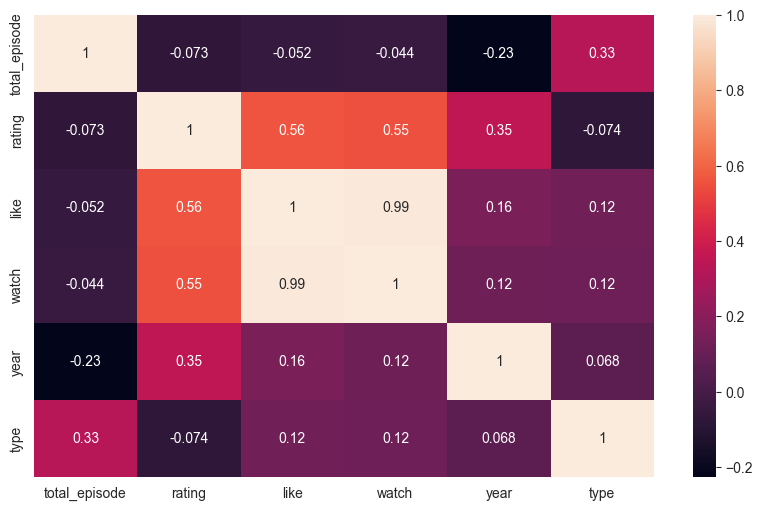

In [40]:
sns.heatmap(df[["total_episode", "rating","like","watch","year","type"]].corr(), annot=True);

In [43]:
for i in df[["total_episode","like","watch","year"]]:
    print(f"corr between rating and {i:<12}: {df.rating.corr(df[i])}")

corr between rating and total_episode: -0.07250755646698455
corr between rating and like        : 0.5600918329563606
corr between rating and watch       : 0.5507738110687767
corr between rating and year        : 0.3530015401662293


In [44]:
X = df.drop(columns = "rating") #this is our feature
y = df["rating"]   #target variable

In [45]:
print(X,y)

      total_episode  like  watch  year  dram  romantik  komedi  fantastik  \
0                22    11      3  2010     0         1       0          0   
1                20    82     64  2011     1         1       0          1   
2                24    46     32  2010     1         0       0          0   
3                20   198    150  2010     1         0       1          1   
4                24    10      9  2010     1         1       0          0   
...             ...   ...    ...   ...   ...       ...     ...        ...   
1003             16    77     32  2024     0         0       0          0   
1004             16    62     28  2024     1         1       0          1   
1005             16    58     36  2024     1         1       0          0   
1006             16    81     44  2024     1         1       1          0   
1007             10    46     12  2024     1         0       0          0   

      gizem  aksiyon  gençlik  suç  gerilim  tarih  aile  çin dizileri  huk

In [51]:
from sklearn.model_selection import train_test_split   #We use this for the split randomly
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # performanca evulations 


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42) 


In [53]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

X Train features shape: (705, 36)
y Train features shape: (705,)
X Test features shape : (303, 36)
Y Test features shape : (303,)


In [54]:
model = LinearRegression()

In [55]:
#Now we fit the data. Time to entertainment
model.fit(X_train, y_train)

LinearRegression()

In [56]:
ypred = model.predict(X_test)  #our prdicts
ypred

array([ 8.60449922,  7.88565824,  8.5294042 ,  8.33351349,  8.57256863,
        7.97451712,  8.54831359,  9.27640513,  6.90939912,  7.3048975 ,
        8.6855068 ,  8.27926052,  8.15458291,  8.62600543,  8.15283999,
        8.00269639,  8.65379771,  8.41860788,  7.99674605,  7.61911323,
        8.76574068,  8.18463278,  7.79596586,  7.8481838 ,  8.5775182 ,
        7.60688344,  7.85881983,  7.9103315 ,  8.26718491,  8.40444294,
        8.21754074,  8.32584057,  7.92684957,  8.0816811 ,  8.57131882,
        7.14446424,  8.21371738,  7.6265248 ,  8.17914608,  7.26917197,
        8.16684531,  8.26112315,  7.91296622,  8.6209042 ,  7.99789522,
        8.07187478,  9.03444047,  8.25660055,  8.70713125,  8.87582501,
        9.36263521,  8.53873578,  7.96902647,  8.13376785,  8.45733486,
        8.89191271,  8.78410666,  7.54391869,  7.27297024,  8.18834863,
        8.44737289,  7.8402504 ,  7.75734346,  8.55496404,  8.25669039,
        8.51483107,  8.71922685,  7.91201071,  7.6831724 ,  8.21

In [57]:
model.coef_  # give the coeff in model(total_episode,like, watch... )

array([ 5.53633971e-03,  8.03084532e-04,  2.55690793e-03,  6.29177718e-02,
        1.51212715e-01,  7.62696965e-02,  4.85847545e-02,  1.58664114e-01,
        5.77777117e-02,  2.59753021e-01,  2.75804866e-02,  6.77391072e-02,
        9.63958673e-02,  1.60855656e-01, -9.84181949e-03, -1.60329022e-01,
        3.52599656e-02, -8.57119517e-02, -9.74639786e-01,  9.88945118e-02,
       -2.43630436e-01, -4.89402412e-01,  4.09433713e-01, -3.25298318e-01,
        7.97110072e-02,  3.98797673e-01, -1.28079880e-02,  1.70424313e-01,
        1.31411767e-01,  2.52461827e-01, -1.98587659e-02,  1.83038395e-01,
       -3.48942351e-02,  8.12549106e-02,  1.62367002e-01, -3.81466297e-01])

In [58]:
model.feature_names_in_  

array(['total_episode', 'like', 'watch', 'year', 'dram', 'romantik',
       'komedi', 'fantastik', 'gizem', 'aksiyon', 'gençlik', 'suç',
       'gerilim', 'tarih', 'aile', 'çin dizileri', 'hukuk', 'bilim kurgu',
       'anime', 'animasyon', 'japon dizileri', 'tayvan dizileri',
       'medikal', 'tayland dizileri', 'korku', 'polisiye', 'macera',
       'savaş', 'aksiyon & macera', 'Kim Won-hae', 'Sung Dong-il',
       'Kim Sang-ho', 'Kim Hae-sook', 'Ahn Nae-sang', 'Oh Jung-se',
       'type'], dtype=object)

In [59]:
model.intercept_ 

-118.99294105790165

In [60]:
my_dict = {"Actual": y_test, "pred": ypred, "residual":y_test-ypred}

In [61]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
938,9.10,8.60,0.50
630,7.50,7.89,-0.39
682,9.20,8.53,0.67
514,8.90,8.33,0.57
365,9.00,8.57,0.43
...,...,...,...
777,9.40,9.36,0.04
370,9.60,8.33,1.27
7,6.30,7.05,-0.75
155,7.20,7.61,-0.41


In [64]:
R2_score = r2_score(y_test, ypred)
R2_score

0.5145482620840436

In [65]:
# MAE hesabı
mae = mean_absolute_error(y_test, ypred)
mae  #we want to decrease result
#MAE'nin düşük olması, modelin daha iyi tahminler yaptığı ve gerçek değerlere daha yakın olduğu anlamına gelir.

0.4863673437851054

In [66]:
# MSE hesabı
mse = mean_squared_error(y_test, ypred)
mse  

0.38802044415035575

In [67]:
# Root Mean Square Error hesabı RMSE
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse  
#mae ile arlarında ço farklı fark varsa kullanıalcak olan rmsedir. çünkü hatlaarı daha iyi cezalandırdığı için.

0.622912870432419

In [68]:
# Error metrics

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [69]:
eval_metric(y_test, ypred)

Model testing performance: 
---------------------------
R2_score 	: 0.5145482620840436
MAE 		: 0.4863673437851054
MSE 		: 0.38802044415035575
RMSE 		: 0.622912870432419


In [70]:
# X_train degerlerini prediction yapacağız
y_train_pred = model.predict(X_train)

In [71]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.4847049089568901
MAE 		: 0.4864366733702832
MSE 		: 0.4089290607735138
RMSE 		: 0.6394756139005723


In [74]:
residuals = y_test - ypred
